# Исследовательский анализ данных (EDA)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

<b>Задача</b><br>
Для составления аналитического отчета о безопасности дорог в РФ и принятию управленческих решений о планировании модернизации дорожной сети необходимо исследовать и подготовить данные по вопросам:
1. Найти регионы с наибольшей аварийностью.
2. Определить распределение числа ДТП по типам дорог, по видам ДТП.
3. Исследовать зависимость числа ДТП от дня недели.
4. Определить регионы с наибольшей аварийностью, числом погибших, пострадавших, участников ДТП.
5. Исследовать время ожидания сотрудников ДПС.
6. Исследовать число участников ДТП.
7. Исследовать ДТП в ночное время суток.
8. Определить наиболее опасные дороги.

<b>1. Регионы с наибольшей аварийностью

In [3]:
df = pd.read_excel('dtp_good.xlsx')
df.head(1)

,reg_code,region_name,road_code,road_name,road_type,address,crash_type_name,crash_date,crash_time,crash_reason,fatalities_amount,victims_amount,vehicles_amount,participants_amount,datetime,crash_date_day,wait_time
0,46,Московская область,отсутствует,мкр. Авиационный-Лямцино-ММК,Региональная или межмуниципальная дорога общег...,"ЦФО, Московская область, Городской округ Домод...",Опрокидывание,20181231,23:55:00,Другие нарушения ПДД водителями,1,0,1,12,2018-12-31 23:55:00,Понедельник,143.807252


In [4]:
df.info

<bound method DataFrame.info of        reg_code              region_name    road_code  \
0            46       Московская область  отсутствует   
1            53     Оренбургская область  53К-2118000   
2            46       Московская область        А-107   
3             8         Хабаровский край        А-375   
4            35          Республика Крым      35Н-076   
...         ...                      ...          ...   
39080        80  Республика Башкортостан      80Н-069   
39081        79        Республика Адыгея  отсутствует   
39082         3       Краснодарский край        Р-217   
39083        76       Забайкальский край        А-350   
39084        63      Саратовская область  отсутствует   

                                               road_name  \
0                           мкр. Авиационный-Лямцино-ММК   
1                                     Обход г. Оренбурга   
2      "Московское малое кольцо" Икша - Ногинск - Бро...   
3      "Восток" Хабаровск - Красный Яр - Ар

In [5]:
df.shape[0] # число строк в датасете

39085

In [6]:
dtp_count = df['region_name'].value_counts().sort_values(ascending=False)
dtp_count # ДТП по регионам

Московская область                 2764
Краснодарский край                 2294
Ленинградская область              1425
Республика Башкортостан            1075
Ставропольский край                 956
                                   ... 
Севастополь                          90
Томская область                      89
Ямало-Ненецкий автономный округ      86
Магаданская область                  82
Республика Ингушетия                 82
Name: region_name, Length: 83, dtype: int64

In [6]:
dtp_count = df['region_name'].value_counts().sort_values(ascending=True).reset_index()
dtp_count.columns = ['region_name', 'dtp_count']
dtp_count['perc'] = (dtp_count['dtp_count'] / dtp_count['dtp_count'].sum()) * 100 # относительные значения ДТП в каждом регионе

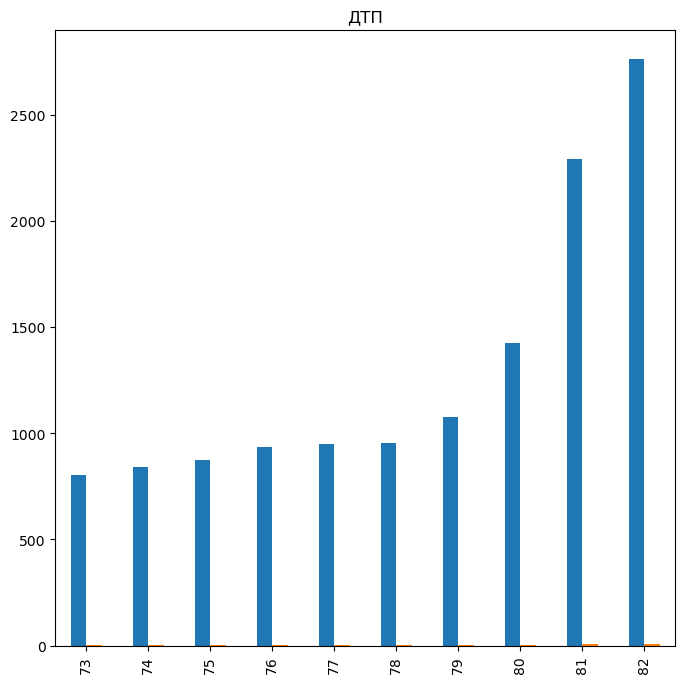

In [8]:
dtp_count.tail(10).plot(kind='bar',
                        figsize= (8,8),
                        title='ДТП',
                        legend=False
                       )
plt.show() # график, показывающий регионы с наибольшим количеством ДТП

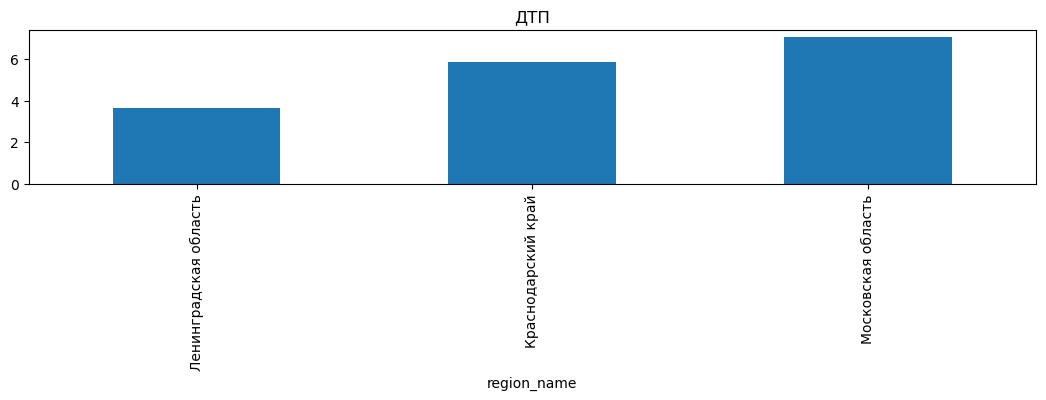

In [11]:
dtp_count.tail(3).plot(kind ='bar',
                             figsize=(13,2),
                             title ='ДТП',
                             legend =False,
                             x='region_name',
                             y='perc')

plt.show() # график, показывающий регионы с наибольшим процентом ДТП


Выводы: Ленинградская и Московская области, а также Краснодарский край наиболее аварийные регионы

<b>2. Определить распределение числа ДТП по типам дорог, по видам ДТП.

In [13]:
dtp_count1 = df['road_type'].value_counts().sort_values(ascending=True).reset_index()
dtp_count1.columns = ['road_type', 'dtp_count']
dtp_count1 #Число ДТП по типам дорог

,road_type,dtp_count
0,отсутствует,192
1,Федеральная дорога общего пользования,16644
2,Региональная или межмуниципальная дорога общег...,22249


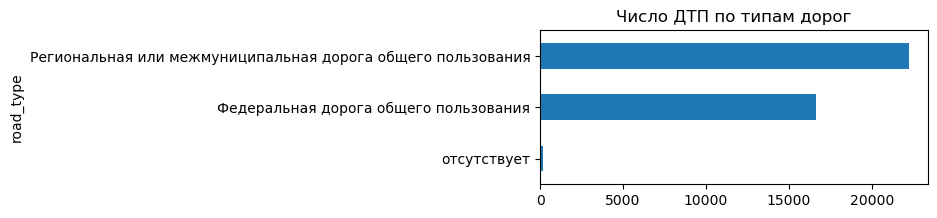

In [14]:
dtp_count1.tail(5).plot(kind='barh',
                        figsize=(5,2),
                        title='Число ДТП по типам дорог',
                        legend=False,
                        x='road_type',
                        y='dtp_count'
                       )
plt.show() # график ДТП по типам дорог

In [36]:
dtp_count2 = df['crash_type_name'].value_counts().sort_values(ascending=True).reset_index()
dtp_count2.columns = ['crash_type_name', 'count']
dtp_count2 # ДТП по причине 

,crash_type_name,count
0,Возгорание вследствие технической неисправност...,1
1,"Наезд на лицо, не являющееся участником дорожн...",3
2,"Наезд на лицо, не являющееся участником дорожн...",8
3,Наезд на гужевой транспорт,11
4,Наезд на внезапно возникшее препятствие,11
5,Падение груза,17
6,Отбрасывание предмета(отсоединение колеса),44
7,"Наезд на лицо, не являющееся участником дорожн...",57
8,Иной вид ДТП,108
9,Падение пассажира,191


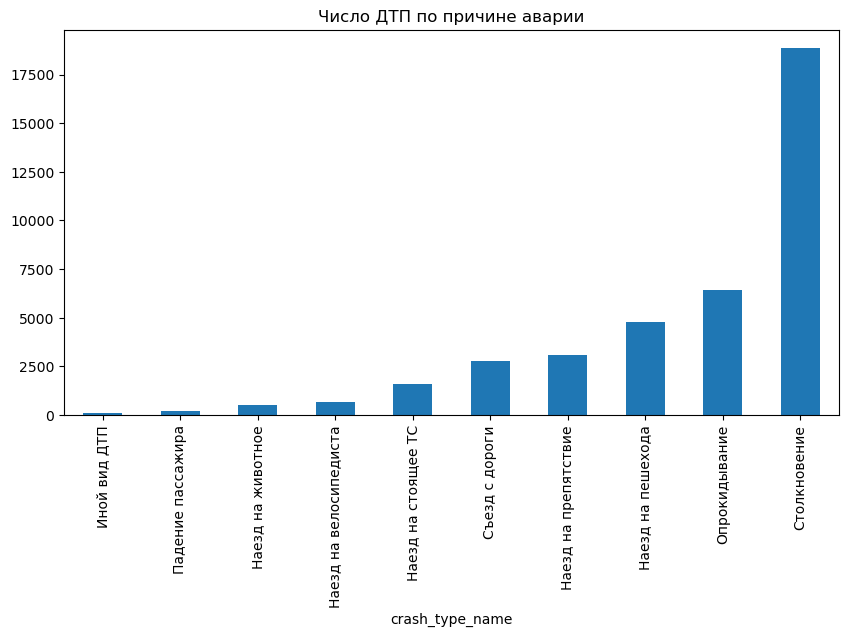

In [37]:
dtp_count2.tail(10).plot(kind='bar',
                       figsize=(10,5),
                       title='Число ДТП по причине аварии',
                        legend=False,
                        x='crash_type_name',
                        y='count')
                       
plt.show() # рисуем график, на котром изображены 10 наиболее частых причин аварий

Выводы: Наибольшее количество ДТП происходит на региональных или межмуниципальных дорогах, наиболее частая причина - столкновение.

<b>3. Исследовать зависимость числа ДТП от дня недели.

In [38]:
days = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье'] # зададим список дней недели, а далее используем в качестве индекса
dtp_count2 = df['crash_date_day'].value_counts()
dtp_count2 = pd.DataFrame(dtp_count2, index = days)
dtp_count2 

,crash_date_day
Понедельник,5269
Вторник,4958
Среда,4886
Четверг,4946
Пятница,5902
Суббота,6602
Воскресенье,6522


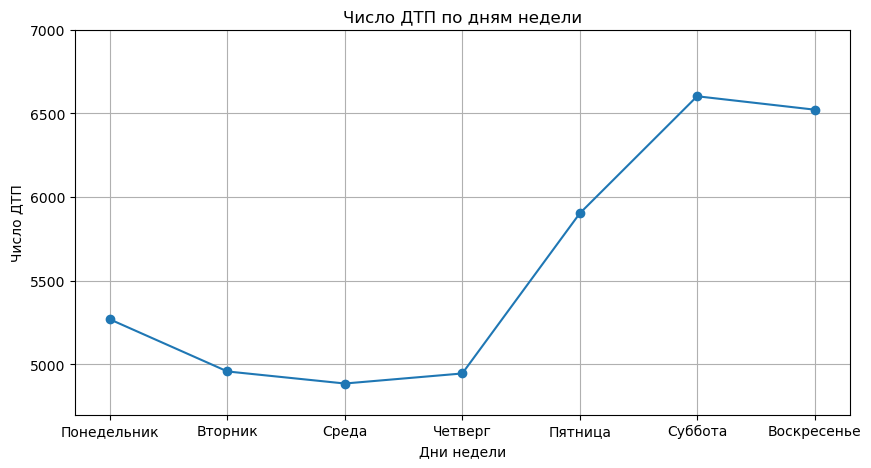

In [39]:
dtp_count2.plot(
        style='o-',
        grid=True,
        figsize=(10, 5),
        ylim=(4700, 7000),
        title='Число ДТП по дням недели',
        ylabel='Число ДТП',
        xlabel='Дни недели',
        legend = False
       )
plt.show()

Выводы: Наибольшее число ДТП в выходные дни, а именно в субботу

<b>4. Определить регионы с наибольшей аварийностью, числом погибших, пострадавших, участников ДТП.

<b> 5. Исследовать время ожидания сотрудников ДПС.

<AxesSubplot:>

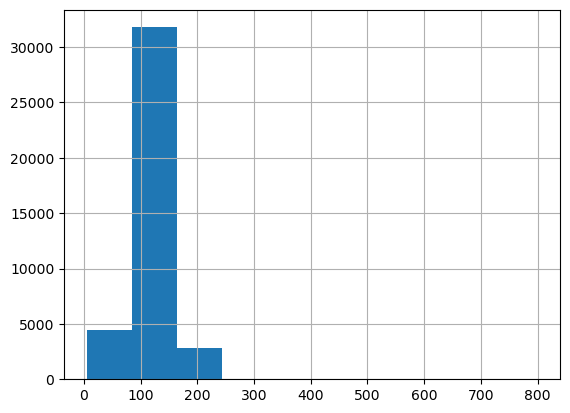

In [51]:
df['wait_time'].hist() # график с временем ожидания

<AxesSubplot:xlabel='region_name', ylabel='wait_time'>

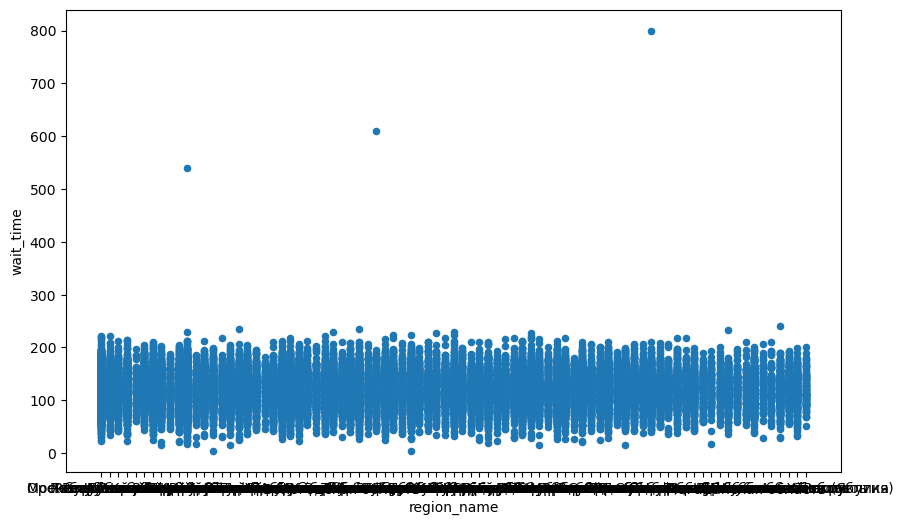

In [52]:
df.plot(kind='scatter',
          y='wait_time',
          x='region_name',
          figsize=(10, 6)) #строим точечную диаграмму, чтобы увидеть "выпадающие" значения

<AxesSubplot:>

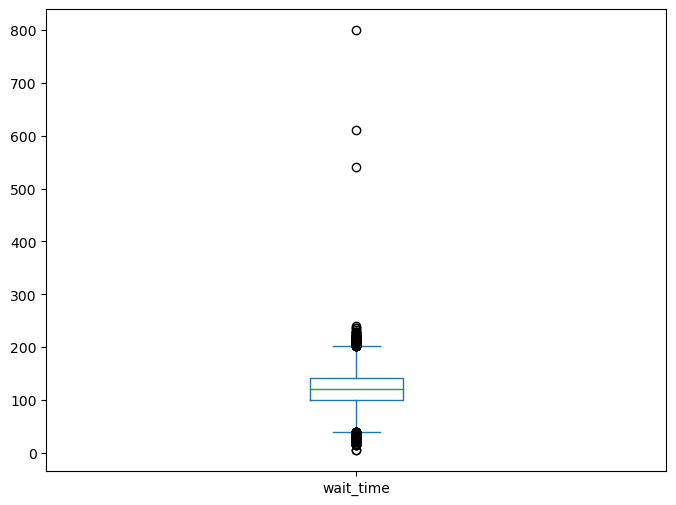

In [53]:
df['wait_time'].plot(kind='box', figsize=(8, 6)) # строим диаграмму размаха

Выводы: по диаграмме видно 3 экстремальных выброса, хвосты из выбросов со значениями 0-40 и 200-250

In [54]:
df['wait_time'].describe() #смотрим на значения перцентилей, медианы, минимума, максимума.

count    39085.000000
mean       120.405894
std         30.347460
min          4.748831
25%        100.007374
50%        120.524415
75%        140.796472
max        800.000000
Name: wait_time, dtype: float64

In [56]:
def ejection (dat,col):
    q75 = np.percentile(dat[col], 75)
    q25 = np.percentile(dat[col],25)
    iqr = q75-q25
    ejection_h = q75 + iqr*1.5
    ejection_l = q25 - iqr*1.5
    ejection_count = dat[col][(dat[col] > ejection_h) | (dat[col] < ejection_l)].count()
    ejection_perc = ejection_count/dat[col].count() * 100
    return(ejection_h, ejection_l, ejection_count, ejection_perc, iqr)
ejection(df,'wait_time') # вычисляем значения перцентилей, количество выбросов, процент их в датасете.

(201.9801186935365,
 38.823726829941734,
 259,
 0.662658308814123,
 40.78909796589869)

In [59]:
df2 = df[(df['wait_time'] < ejection(df,'wait_time')[0]) & (df['wait_time'] > ejection(df,'wait_time')[1])]
df2 = df2.reset_index(drop=True)
df2.head(5)

,reg_code,region_name,road_code,road_name,road_type,address,crash_type_name,crash_date,crash_time,crash_reason,fatalities_amount,victims_amount,vehicles_amount,participants_amount,datetime,crash_date_day,wait_time
0,46,Московская область,отсутствует,мкр. Авиационный-Лямцино-ММК,Региональная или межмуниципальная дорога общег...,"ЦФО, Московская область, Городской округ Домод...",Опрокидывание,20181231,23:55:00,Другие нарушения ПДД водителями,1,0,1,12,2018-12-31 23:55:00,Понедельник,143.807252
1,53,Оренбургская область,53К-2118000,Обход г. Оренбурга,Региональная или межмуниципальная дорога общег...,"ПФО, Оренбургская область, Оренбург",Наезд на препятствие,20181231,23:55:00,Другие нарушения ПДД водителями,1,0,1,2,2018-12-31 23:55:00,Понедельник,148.198679
2,46,Московская область,А-107,"""Московское малое кольцо"" Икша - Ногинск - Бро...",Федеральная дорога общего пользования,"ЦФО, Московская область, Дмитровский район",Опрокидывание,20181231,23:40:00,Превышение установленной скорости движения,1,0,1,2,2018-12-31 23:40:00,Понедельник,71.441987
3,8,Хабаровский край,А-375,"""Восток"" Хабаровск - Красный Яр - Ариадное - Ч...",Федеральная дорога общего пользования,"ДФО, Хабаровский край, Хабаровский район",Наезд на пешехода,20181231,23:20:00,Нахождение на проезжей части без цели её перех...,0,1,1,2,2018-12-31 23:20:00,Понедельник,143.569055
4,35,Республика Крым,35Н-076,Симферополь - Севастополь - Бахчисарай,Региональная или межмуниципальная дорога общег...,"ЮФО, Республика Крым, Бахчисарайский район",Наезд на пешехода,20181231,23:00:00,Нарушение правил проезда пешеходного перехода,1,0,1,2,2018-12-31 23:00:00,Понедельник,120.542764


<AxesSubplot:>

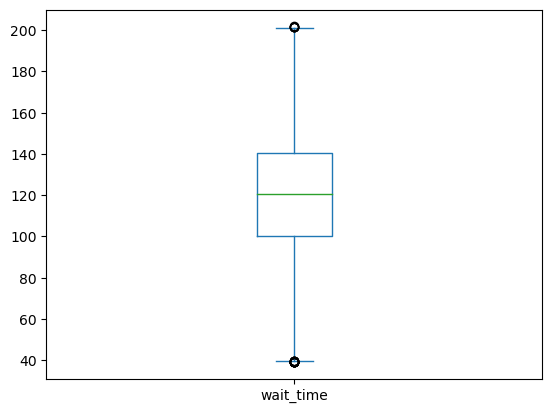

In [61]:
df2["wait_time"].plot(kind="box") # смотрим изменения

In [64]:
df.describe()

,reg_code,crash_date,fatalities_amount,victims_amount,vehicles_amount,participants_amount,wait_time
count,39085.000000,3.908500e+04,39085.000000,39085.000000,39085.000000,39085.000000,39085.000000
mean,53.013535,2.018085e+07,1.555200,0.232698,1.790431,4.316259,120.405894
std,72.937369,2.529252e+02,1.412839,0.591504,0.895217,3.537298,30.347460
min,1.000000,2.018040e+07,0.000000,0.000000,1.000000,2.000000,4.748831
25%,22.000000,2.018062e+07,1.000000,0.000000,1.000000,2.000000,100.007374
50%,46.000000,2.018090e+07,1.000000,0.000000,2.000000,3.000000,120.524415
75%,70.000000,2.018110e+07,2.000000,0.000000,2.000000,4.000000,140.796472
max,719.000000,2.018123e+07,46.000000,13.000000,19.000000,85.000000,800.000000


In [63]:
df2.describe()

,reg_code,crash_date,fatalities_amount,victims_amount,vehicles_amount,participants_amount,wait_time
count,38826.000000,3.882600e+04,38826.000000,38826.000000,38826.000000,38826.000000,38826.000000
mean,53.041003,2.018085e+07,1.554448,0.232602,1.790038,4.314274,120.379495
std,73.066801,2.529254e+02,1.410013,0.591948,0.894260,3.536578,29.160773
min,1.000000,2.018040e+07,0.000000,0.000000,1.000000,2.000000,38.858157
25%,22.000000,2.018062e+07,1.000000,0.000000,1.000000,2.000000,100.174698
50%,46.000000,2.018090e+07,1.000000,0.000000,2.000000,3.000000,120.526717
75%,70.000000,2.018110e+07,2.000000,0.000000,2.000000,4.000000,140.621013
max,719.000000,2.018123e+07,46.000000,13.000000,19.000000,85.000000,201.878534


Выводы: максимальное значение времени ожидания снизилось с 800 минут до 201 минуты

In [65]:
df3 = df2.pivot_table(index = 'region_name',
                      aggfunc = 'mean',
                      values = 'wait_time')
df3 = df3.sort_values(by = 'wait_time', ascending=False)
df3.head()

,wait_time
region_name,
Республика Марий Эл,124.047395
Калининградская область,123.739773
Ульяновская область,123.374310
Алтайский край,123.280042
Санкт-Петербург,123.233526


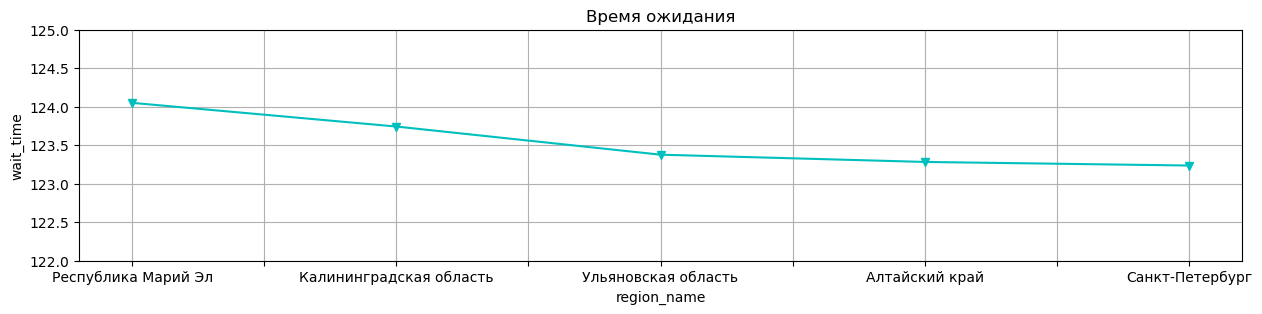

In [68]:
df3.head().plot(
        style='cv-',
        grid=True,
        figsize=(15, 3),
        ylim=(122, 125),
        title='Время ожидания',
        ylabel='wait_time',
        xlabel='region_name',
        legend=False
       )
plt.show()


Выводы: Больше всего ДТП в республике Марий Эл

<b> 6. Исследование числа участников ДТП

<AxesSubplot:>

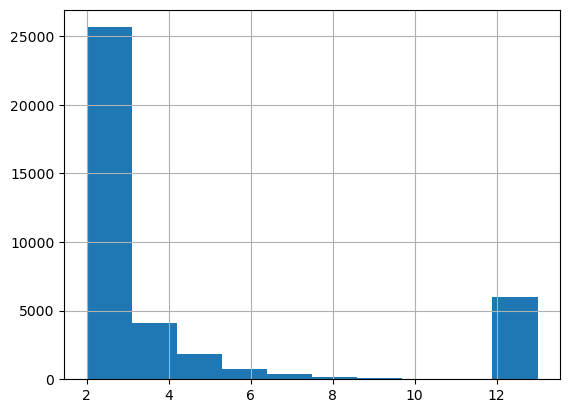

In [70]:
df['participants_amount'].hist(range=(2,13)) # строим график числа участников ДТП

<AxesSubplot:xlabel='region_name', ylabel='participants_amount'>

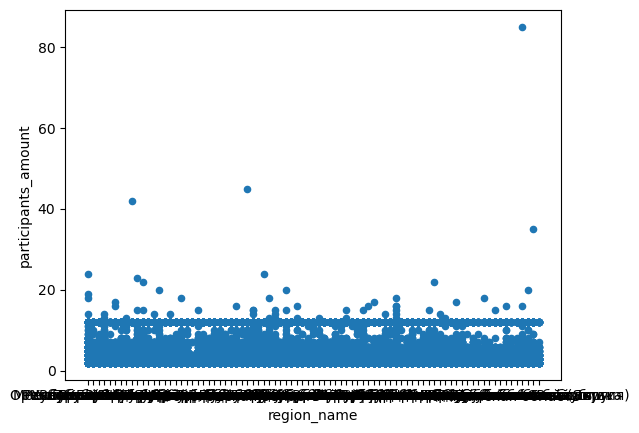

In [72]:
df.plot(kind="scatter",y="participants_amount",x = "region_name") # построим точечную диаграмму, чтобы увидеть экстремальные значения

<AxesSubplot:>

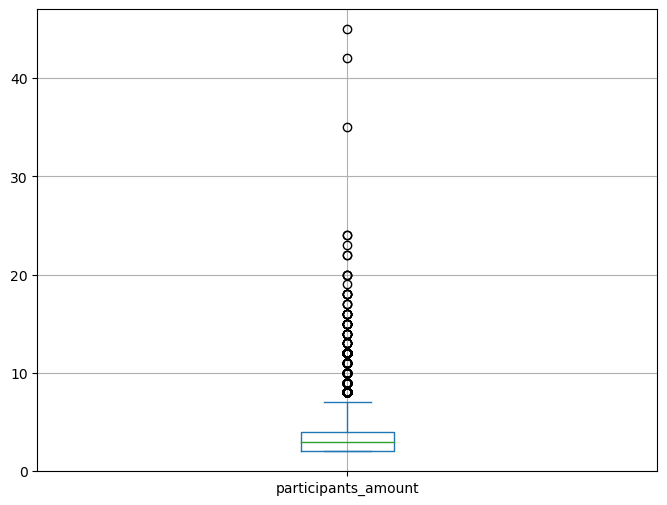

In [76]:
df['participants_amount'].plot(kind='box', figsize=(8, 6), ylim=(0,47), grid=True) # строим диаграмму размаха

In [77]:
df['participants_amount'].describe() # смотрим значения перцентилей, медианы, максимума, минимума

count    39085.000000
mean         4.316259
std          3.537298
min          2.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         85.000000
Name: participants_amount, dtype: float64

In [80]:
q75 = np.percentile(df['participants_amount'], 75)
q25 = np.percentile(df['participants_amount'], 25)
iqr = q75 - q25 
participants_amount_ejection_h = q75 +iqr * 1.5
participants_amount_ejection_l = q25 - iqr * 1.5

ejection(df,'participants_amount') # вычисляем значения перцентилей, число выбросов и тд

(7.0, -1.0, 6359, 16.269668670845594, 2.0)

Выводы: Число выбросов - 6359


In [81]:
participants_amount_ejection_h = np.percentile(df['participants_amount'], 95)
participants_amount_ejection_h # смотрим границу при 95 перцентиле

12.0

In [87]:
df3 = df['participants_amount'][df['participants_amount'] > participants_amount_ejection_h].count()
print('Число выбросов:', participants_amount_count ) # определим новое число выбросов

Число выбросов: 59


In [88]:
df4 = (df3 / len(df)) * 100
df4 # считаем процент выбросов из общего датасета

0.15095305104259946

<AxesSubplot:>

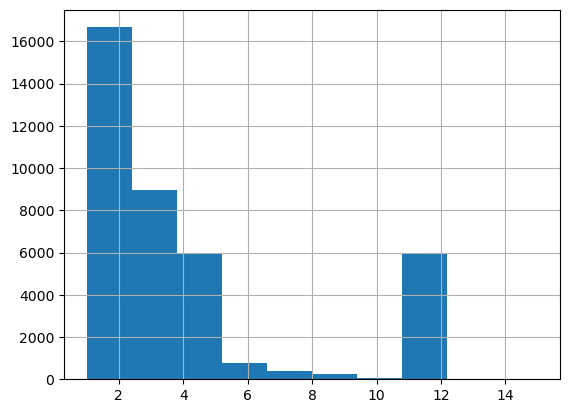

In [90]:
df['participants_amount'].hist(range=(1, 15))

Выводы: на графике видно, что значения 11-12 - экстремальные 

In [91]:
df5 = df[(df["participants_amount"] < np.percentile(df["participants_amount"],95))]
df5.head(3) # убираем экстремальные значения

,reg_code,region_name,road_code,road_name,road_type,address,crash_type_name,crash_date,crash_time,crash_reason,fatalities_amount,victims_amount,vehicles_amount,participants_amount,datetime,crash_date_day,wait_time
1,53,Оренбургская область,53К-2118000,Обход г. Оренбурга,Региональная или межмуниципальная дорога общег...,"ПФО, Оренбургская область, Оренбург",Наезд на препятствие,20181231,23:55:00,Другие нарушения ПДД водителями,1,0,1,2,2018-12-31 23:55:00,Понедельник,148.198679
2,46,Московская область,А-107,"""Московское малое кольцо"" Икша - Ногинск - Бро...",Федеральная дорога общего пользования,"ЦФО, Московская область, Дмитровский район",Опрокидывание,20181231,23:40:00,Превышение установленной скорости движения,1,0,1,2,2018-12-31 23:40:00,Понедельник,71.441987
3,8,Хабаровский край,А-375,"""Восток"" Хабаровск - Красный Яр - Ариадное - Ч...",Федеральная дорога общего пользования,"ДФО, Хабаровский край, Хабаровский район",Наезд на пешехода,20181231,23:20:00,Нахождение на проезжей части без цели её перех...,0,1,1,2,2018-12-31 23:20:00,Понедельник,143.569055


<AxesSubplot:>

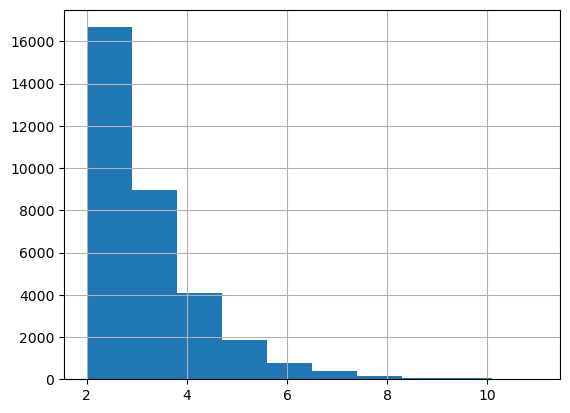

In [94]:
df5['participants_amount'].hist() # строим график

In [95]:
df5['participants_amount'].describe() # изучаем значения медианы, перцентилей, минимума, максимума и тд

count    33063.000000
mean         2.905121
std          1.260266
min          2.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: participants_amount, dtype: float64

In [96]:
df['participants_amount'].describe()

count    39085.000000
mean         4.316259
std          3.537298
min          2.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         85.000000
Name: participants_amount, dtype: float64

Выводы: Максимальное значение снизилось с 85 до 11

In [98]:
df6 = df5.pivot_table(index = 'region_name',
                      aggfunc = 'mean',
                      values = 'participants_amount')
df6 = df6.sort_values(by = 'participants_amount', ascending=False)
df6.head() # исследуем среднее количество участников ДТП по регионам

,participants_amount
region_name,
Республика Калмыкия,3.678322
Республика Тыва,3.335821
Ямало-Ненецкий автономный округ,3.328571
Республика Ингушетия,3.309859
Забайкальский край,3.269341


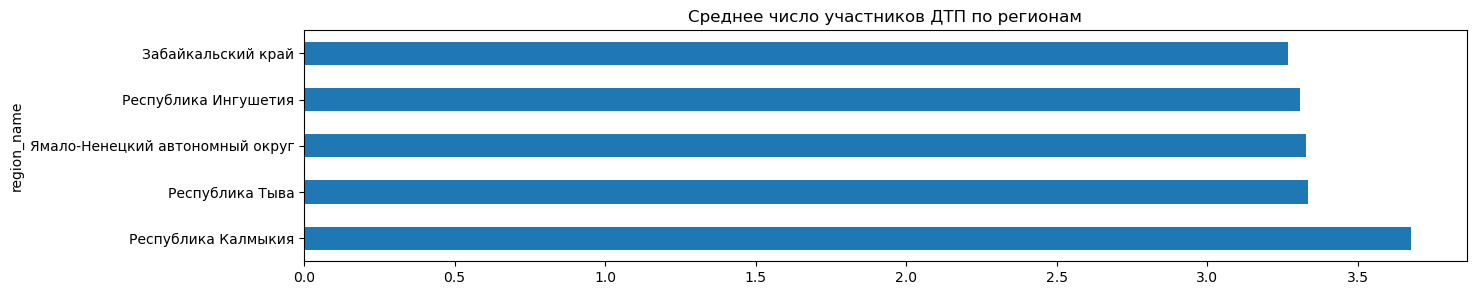

In [100]:
df6.head().plot(kind = 'barh',
        figsize=(15, 3),
        ylim=(2, 4),
        title='Среднее число участников ДТП по регионам',
        ylabel='participants_amount',
        xlabel='region_name',
        legend=False
       )
plt.show()

Выводы: В среднем в Калмыкии больше всего участников ДТП.

<b>7. Исследовать ДТП в ночное время суток.

<AxesSubplot:ylabel='Frequency'>

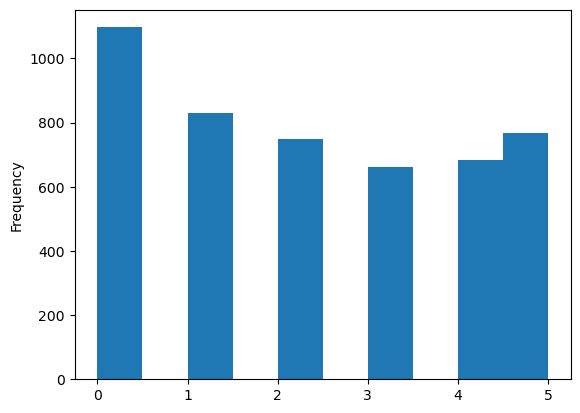

In [101]:
df['hour'] = df['datetime'].dt.hour
df.query('hour.isin((0,1,2,3,4,5))')["hour"].plot(kind="hist") # рисуем график ДТП в ночное время суток (с 0 до 5 утра)

Выводы: Наибольшее количество ДТП в ночное время в 12 часов ночи

<b>8.Определить наиболее опасные дороги.

In [102]:
federal = df.query('road_type == "Федеральная дорога общего пользования"')
region = df.query('road_type == "Региональная или межмуниципальная дорога общего пользования"')

print(pd.pivot_table(federal, index = 'road_code', aggfunc='sum', values = 'fatalities_amount').sort_values(by='fatalities_amount', ascending=False).head())
print(pd.pivot_table(region, index = 'road_code', aggfunc='sum', values = 'fatalities_amount').sort_values(by="fatalities_amount", ascending=False).head())

           fatalities_amount
road_code                   
М-7                     1933
М-5                     1922
М-4                     1629
Р-217                   1614
Р-255                    918
             fatalities_amount
road_code                     
отсутствует              27726
35А-002                    216
03К-002                    170
35А-001                    167
87Р-001                    153


Выводы: самая опасная федеральная дорога - M-7, региональная - 35А-002

In [104]:
drf = df.query('road_code == "М-7"')
drf1 = drf.pivot_table( index = 'region_name',
                      aggfunc = 'sum',
                      values = 'fatalities_amount')
drf1 = drf1.sort_values(by = 'fatalities_amount', ascending = False)
drf1.head()

,fatalities_amount
region_name,
Владимирская область,563
Нижегородская область,343
Республика Татарстан,262
Московская область,202
Удмуртская Республика,192


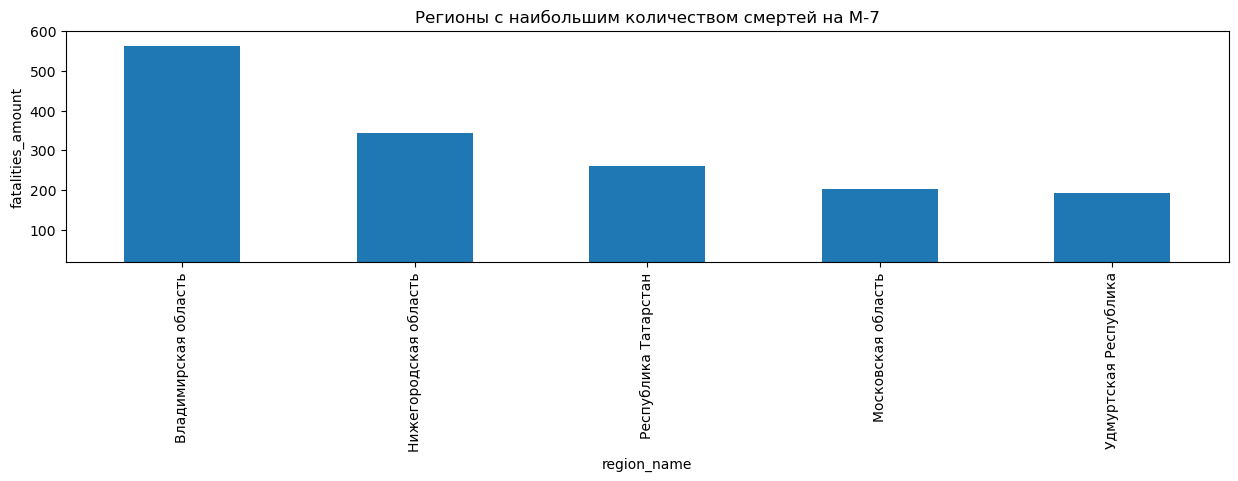

In [110]:
drf1.head(5).plot(kind = 'bar',
                  figsize=(15, 3),
                  ylim=(20, 600),
                  title='Регионы с наибольшим количеством смертей на М-7',
                  ylabel='fatalities_amount',
                  xlabel='region_name',
                  legend=False
       )
plt.show()

Выводы: Чаще всего смерти на М-7 случаются во Владимирской области

In [108]:
drr = df.query('road_code == "35А-002"')
drr1 = drr.pivot_table(index = 'region_name',
                      aggfunc = 'sum',
                      values = 'fatalities_amount')
drr1 = drr1.sort_values(by = 'fatalities_amount', ascending=False)
drr1

,fatalities_amount
region_name,
Республика Крым,216


Выводы: все смерти на 35А-002 происходят в республике Крым